## Install modules to environment

In [1]:
%pip install pandas numpy requests seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import modules

In [2]:
from Backtesting.dataFetchers.marketDataFetchers import CoinbaseFetcher
from Backtesting.dataFetchers.onChainMetricsFetchers import CryptoQuantFetcher
from Backtesting.dataFetchers.onChainMetricsFetchers import CryptoQuantFetcherWithoutExchange
from Backtesting.strategies.metaFusionStrategy import MetaFusionStrategy
from Backtesting.backtest import Backtest

from datetime import datetime



## Fetch Data

Input API key and desired interval and window

In [3]:
API_KEY = "GlYxSZP9hnooNl6gGAjtkptkeqehSnk5C60Akhpw5zupBK6O"
LIMIT = 1000


### Market Data

In [4]:
MARKET_DATA_BASE_URL = "https://api.datasource.cybotrade.rs/coinbase/candle"

SYMBOL = "BTC-USD" # Can be any symbol available on Coinbase
INTERVAL = "1h" # Can be any interval such as "1d", "1h", "15m", etc.

In [5]:
# start_time = int(datetime(2023, 1, 1).timestamp() * 1000)
# end_time = int(datetime(2024, 12, 31, 23, 59).timestamp() * 1000)

bt_start_time = int(datetime(2021, 1, 1).timestamp() * 1000)
bt_end_time = int(datetime(2023, 12, 31, 23, 59).timestamp() * 1000)

ft_start_time = int(datetime(2023, 1, 1).timestamp() * 1000)
ft_end_time = int(datetime(2024, 1, 1, 23, 59).timestamp() * 1000)

# bt_start_time = int(datetime(2023, 1, 1).timestamp() * 1000)
# bt_end_time = int(datetime(2023, 2, 1, 23, 59).timestamp() * 1000)

# ft_start_time = int(datetime(2024, 1, 1).timestamp() * 1000)
# ft_end_time = int(datetime(2024, 2, 1, 23, 59).timestamp() * 1000)


In [6]:
market_data_fetcher = CoinbaseFetcher(API_KEY, MARKET_DATA_BASE_URL, SYMBOL, LIMIT)

### On Chain Metrics Data 

In [7]:
ONCHAIN_API_KEY = "GlYxSZP9hnooNl6gGAjtkptkeqehSnk5C60Akhpw5zupBK6O"
ONCHAIN_DATA_BASE_URL = "https://api.datasource.cybotrade.rs/cryptoquant"
GLASSNODE_BASE_URL = "https://api.datasource.cybotrade.rs/glassnode"
EXCHANGE = "binance" # Can be any exchange available on CryptoQuant
CURRENCY = "btc" # Can be any symbol available on CryptoQuant
ASSET = "BTC"
ON_CHAIN_LIMIT = None # Number of data points to fetch

netflow_window = "hour"
netflow_endpoint_category = "exchange-flows"
netflow_metric = "netflow"

exchange_whale_ratio_window = "hour"
exchange_whale_ratio_endpoint_category = "flow-indicator"
exchange_whale_ratio_metric = "exchange-whale-ratio"

funding_rates_window = "hour"
funding_rates_endpoint_category = "market-data"
funding_rates_metric = "funding-rates"

dormancy_window = "day"
dormancy_endpoint_category = "network-indicator"
dormancy_metric = "dormancy"



In [8]:
def fetch_on_chain_datas(start_time, end_time, file_name):
    market_data_fetcher.fetch(start_time, end_time, INTERVAL)

    on_chain_fetcher_netflow = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, netflow_endpoint_category, netflow_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetcher_netflow.fetch_netflow(netflow_window, start_time, end_time)

    on_chain_fetecher_exchange_whale_ratio = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, exchange_whale_ratio_endpoint_category, exchange_whale_ratio_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetecher_exchange_whale_ratio.fetch_exchange_whale_ratio(exchange_whale_ratio_window, start_time, end_time)

    on_chain_fetcher_funding_rates = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, funding_rates_endpoint_category, funding_rates_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetcher_funding_rates.fetch_funding_rates(funding_rates_window, start_time, end_time)

    on_chain_fetcher_without_exchange_dormancy = CryptoQuantFetcherWithoutExchange(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, dormancy_endpoint_category, dormancy_metric, ON_CHAIN_LIMIT)
    on_chain_fetcher_without_exchange_dormancy.fetch_dormancy(dormancy_window, start_time, end_time)


    print("📁 Netflow path:", on_chain_fetcher_netflow.saved_filepath)
    print("📁 Whale Ratio path:", on_chain_fetecher_exchange_whale_ratio.saved_filepath)
    print("📁 Funding Rates path:", on_chain_fetcher_funding_rates.saved_filepath)
    print("📁 Dormancy path:", on_chain_fetcher_without_exchange_dormancy.saved_filepath)

    csvs_to_merge = [
    market_data_fetcher.saved_filepath,
    on_chain_fetcher_netflow.saved_filepath,
    on_chain_fetecher_exchange_whale_ratio.saved_filepath,
    on_chain_fetcher_funding_rates.saved_filepath,
    on_chain_fetcher_without_exchange_dormancy.saved_filepath
    ]

    CryptoQuantFetcher.merge_selected_csv_files(csvs_to_merge, file_name) 




### Fetch hmm model data

In [9]:
backtest_dataset_file_path = "datasets/backtest_data.csv"
forwardtest_dataset_file_path = "datasets/forwardtest_data.csv"

fetch_on_chain_datas(bt_start_time, bt_end_time, backtest_dataset_file_path)
fetch_on_chain_datas(ft_start_time, ft_end_time, forwardtest_dataset_file_path)

Fetching 1h data for BTC-USD from 2020-12-31 16:00:00 to 2023-12-31 15:59:00...
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 996 candles. Total: 996
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieve

c:\Users\JTYAP\VSCodeProjects\um-hackathon-budget-gang\Backtesting\dataFetchers\onChainMetricsFetchers.py:54: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample("1H").ffill()
c:\Users\JTYAP\VSCodeProjects\um-hackathon-budget-gang\Backtesting\dataFetchers\onChainMetricsFetchers.py:69: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start=start_ts, end=end_ts, freq="1H")


✅ Merged CSV saved to: datasets/backtest_data.csv
Fetching 1h data for BTC-USD from 2022-12-31 16:00:00 to 2024-01-01 15:59:00...
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 996 candles. Total: 996
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
💾 Saved to datasets/BTC-USD_1h_Training data_1704902400000_to_1704124740000.csv with 35992 rows.
                         open      high       low     close       volume
timestamp                                                               
2024-01-10 11:00:00  45552.66  45673.42  45030.00  45526.41   869.277461
2024-01-10 12:00:00  45529.63  45663.31  44378.31  44687.73  2048.938817
2024-01-10 13:00:00  44687.72  45394.24  44320.01  45124.46  1393.127787
2024-01-10 14:00:00  45121.40  45415.84  44809.01  44866.80  1405.29

c:\Users\JTYAP\VSCodeProjects\um-hackathon-budget-gang\Backtesting\dataFetchers\onChainMetricsFetchers.py:54: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample("1H").ffill()
c:\Users\JTYAP\VSCodeProjects\um-hackathon-budget-gang\Backtesting\dataFetchers\onChainMetricsFetchers.py:69: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start=start_ts, end=end_ts, freq="1H")


✅ Merged CSV saved to: datasets/forwardtest_data.csv


## Instantiate Strategy

In [10]:
mfs = MetaFusionStrategy(backtest_dataset_file_path, backtest_dataset_file_path)

                timestamp      open      high       low     close  \
1     2021-01-01 01:00:00  29066.58  29545.00  29034.37  29487.95   
2     2021-01-01 02:00:00  29490.29  29539.86  29162.21  29249.05   
3     2021-01-01 03:00:00  29249.05  29417.61  29225.76  29358.30   
4     2021-01-01 04:00:00  29358.30  29465.00  29133.53  29290.52   
5     2021-01-01 05:00:00  29287.95  29305.32  29148.60  29240.79   
...                   ...       ...       ...       ...       ...   
26242 2023-12-30 20:00:00  42345.91  42392.47  42194.28  42276.48   
26243 2023-12-30 21:00:00  42276.49  42323.52  42213.61  42291.50   
26244 2023-12-30 22:00:00  42291.24  42299.98  42059.83  42132.36   
26245 2023-12-30 23:00:00  42132.40  42291.45  42093.90  42141.03   
26246 2023-12-31 00:00:00  42139.32  42412.95  42135.69  42348.37   

            volume  netflow_total  exchange_whale_ratio  funding_rates  \
1      2354.200808     268.894646              0.450396       0.028596   
2      1250.875743     

         1 -201480.01968660             +nan
         2  128695.94694473 +330175.96663133
         3  132871.62646571   +4175.67952099
         4  135055.84443866   +2184.21797294
         5  138362.82748474   +3306.98304608
         6  144334.53865146   +5971.71116672
         7  149799.10524251   +5464.56659105
         8  153313.53675128   +3514.43150876
         9  155462.10118842   +2148.56443714
        10  156311.50745766    +849.40626924
        11  156604.05918146    +292.55172380
        12  156715.52193608    +111.46275462
        13  156758.34698498     +42.82504890
        14  156773.32116225     +14.97417727
        15  156779.53882383      +6.21766158
        16  156782.48204425      +2.94322042
        17  156784.00594625      +1.52390200
        18  156784.84593771      +0.83999146
        19  156785.32864198      +0.48270427
        20  156785.61356338      +0.28492140
        21  156785.78460893      +0.17104555
        22  156785.88837985      +0.10377092
        23

Unique states: [0 2 1]
[0 2 1]
Converged: True
Final log likelihood: 156786.03823165016
State Labels: {0: 'buy', 1: 'sell', 2: 'hold'}
                timestamp      open     close  netflow_total  \
1     2021-01-01 01:00:00  29066.58  29487.95     268.894646   
2     2021-01-01 02:00:00  29490.29  29249.05     160.311902   
3     2021-01-01 03:00:00  29249.05  29358.30      63.804512   
4     2021-01-01 04:00:00  29358.30  29290.52      99.170215   
5     2021-01-01 05:00:00  29287.95  29240.79    -359.647558   
...                   ...       ...       ...            ...   
26242 2023-12-30 20:00:00  42345.91  42276.48     351.792404   
26243 2023-12-30 21:00:00  42276.49  42291.50     546.978911   
26244 2023-12-30 22:00:00  42291.24  42132.36     302.838117   
26245 2023-12-30 23:00:00  42132.40  42141.03    -329.273747   
26246 2023-12-31 00:00:00  42139.32  42348.37    -248.478552   

       exchange_whale_ratio  funding_rates  sa_average_dormancy  log_return  \
1                

c:\Users\JTYAP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - loss: 0.0035
Epoch 2/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 1.2620e-04
Epoch 3/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 9.2812e-05
Epoch 4/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 6.9495e-05
Epoch 5/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 5.8504e-05
Epoch 6/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 4.9285e-05
Epoch 7/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 4.1454e-05
Epoch 8/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 3.6227e-05
Epoch 9/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 3.2723e-05
Epoch 10/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 3.0675e-05


In [11]:
bt = Backtest(mfs, 100000, 10, 0.006)

In [12]:
bt.run()

Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(26187, 60, 5), y=(26187, 3)
🕒 Predicting for 26187 hours ≈ 1091.1 days
819/819 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
Results from LSTM model:
                timestamp  actual_close  actual_high  actual_low  \
60    2021-01-03 12:00:00      34146.74     34618.63    33980.00   
61    2021-01-03 13:00:00      33916.08     34396.00    33857.44   
62    2021-01-03 14:00:00      33921.94     34199.38    33550.00   
63    2021-01-03 15:00:00      33567.82     33974.27    32800.00   
64    2021-01-03 16:00:00      32704.25     33884.16    32623.08   
...                   ...           ...          ...         ...   
26242 2023-12-30 20:00:00      42276.48     42392.47    42194.28   
26243 2023-12-30 21:00:00      42291.50     42323.52    42213.61   
26244 2023-12-30 22:00:00      42132.36     42299.98    42059.83   
26245 202

In [13]:
performance = bt.get_performance_results()

for key, value in performance.items():
    print(f"{key}: {value}")

Start Trade Date: 2021-01-03 13:00:00
End Trade Date: 2023-12-31 00:00:00
Final Portfolio Value: 16003.979819999864
Total Return (%): -83.99602018000014
Number of Trades: 438
Win Rate (%): 0.0
Max Drawdown (%): -0.51
Sharpe Ratio: 0.09


In [14]:
bt.get_trade_logs_csv()

Trade logs saved to backtest_trade_logs.csv


bullish range:  [0.2 0.4 0.6 0.8]
bearish range:  [0.2 0.4 0.6 0.8]
Running with bullish=0.20, bearish=0.20
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(26187, 60, 5), y=(26187, 3)
🕒 Predicting for 26187 hours ≈ 1091.1 days
819/819 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
Results from LSTM model:
                timestamp  actual_close  actual_high  actual_low  \
60    2021-01-03 12:00:00      34146.74     34618.63    33980.00   
61    2021-01-03 13:00:00      33916.08     34396.00    33857.44   
62    2021-01-03 14:00:00      33921.94     34199.38    33550.00   
63    2021-01-03 15:00:00      33567.82     33974.27    32800.00   
64    2021-01-03 16:00:00      32704.25     33884.16    32623.08   
...                   ...           ...          ...         ...   
26242 2023-12-30 20:00:00      42276.48     42392.47    42194.28   
26243 2023-12-30 21:00:00      42291.

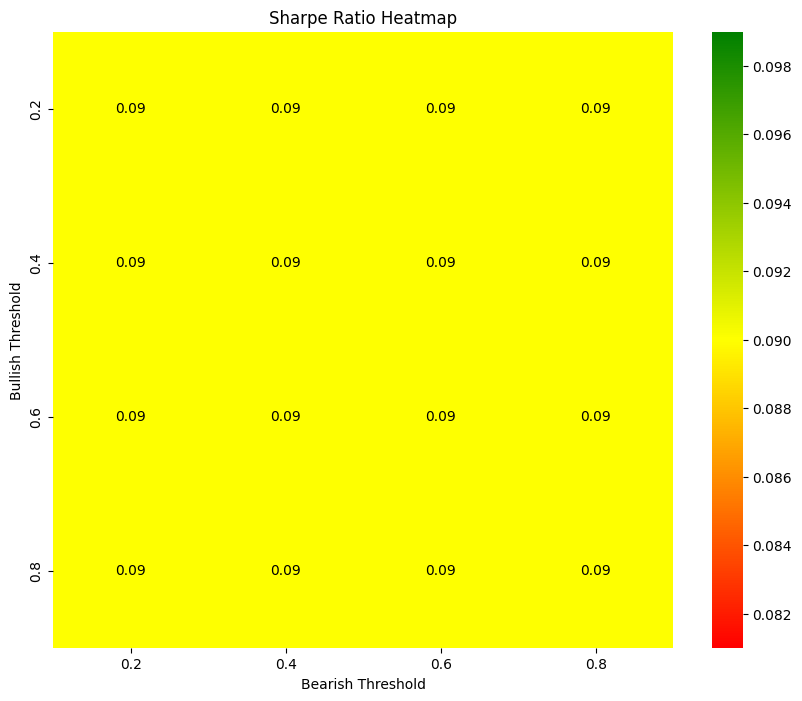

In [15]:
import numpy as np

bt.run_backtest_heatmap(bullish_range=np.linspace(0.2, 0.8, 4), bearish_range=np.linspace(0.2, 0.8, 4), metric='Sharpe Ratio', )

## Perform Forward Testing Using Best Threshold

### Set forward testing dataset

In [16]:
bt.set_predict_filepath(forwardtest_dataset_file_path, forwardtest_dataset_file_path)

### Set best threshold

In [17]:
bt.set_best_thresholds(bull_thres=0.4, bear_thres=0.4)

### Run testing using new dataset

In [18]:
bt.run()

Predict data filepath in DeepPredictorStrategy: datasets/forwardtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/forwardtest_data.csv
✅ Testing set shape: X=(17454, 60, 5), y=(17454, 3)
🕒 Predicting for 17454 hours ≈ 727.2 days
546/546 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Results from LSTM model:
                timestamp  actual_close  actual_high  actual_low  \
60    2023-01-02 06:00:00      16633.59     16654.38    16628.01   
61    2023-01-02 06:00:00      16633.59     16654.38    16628.01   
62    2023-01-02 07:00:00      16714.44     16758.00    16630.33   
63    2023-01-02 07:00:00      16714.44     16758.00    16630.33   
64    2023-01-02 08:00:00      16726.62     16761.92    16701.20   
...                   ...           ...          ...         ...   
17509 2023-12-31 22:00:00      42248.80     42565.48    42100.00   
17510 2023-12-31 23:00:00      42288.06     42339.70    42066.35   
17511 2023-12-31 23:00:00      42288.06     42339.70    42066.35   
1751

In [19]:
performance = bt.get_performance_results()

for key, value in performance.items():
    print(f"{key}: {value}")

Start Trade Date: 2023-01-02 06:00:00
End Trade Date: 2024-01-01 00:00:00
Final Portfolio Value: 19865.327639999923
Total Return (%): -80.13467236000008
Number of Trades: 378
Win Rate (%): 0.0
Max Drawdown (%): -0.06
Sharpe Ratio: 0.21


In [20]:
bt.get_trade_logs_csv()

Trade logs saved to backtest_trade_logs.csv
